# Project 2
### DAV 5400 Spring 2019-Week 7
__Maayan Raviv__
<br>
__Dean Pienica__
<br>
<br>
_Wine Tasting_
***

## Introduction
__The data set:__ The dataset contains information on prices and rating of wines, as well as other attribute like location, taster name, winery and description.  
_Research Question: Is there a correlation between the rating of the wine to its price?_
<br>
We chose this question since wine price ranges can differ a lot from one another, and we were curious to know if the pricing is justified or if we can find great wines in a reasonable price. 

### Data Summery
The data set is from Kaggle. The data was scraped from WineEnthusiast during the week of June 15th, 2017.
<br>
https://www.kaggle.com/zynicide/wine-reviews/version/4
<br>
A data frame with 130K rows and price and rating are continues variables while all others are categorical variables. 
<br>
__The variabels are:__
* __Country-__The country that the wine is from
* __Description-__ Short text description 
* __Designation-__The vineyard within the winery where the grapes that made the wine are from
* __Points-__ The number of points Wine Enthusiast rated the wine on a scale of 1-100 , although it’s include only 80 points and above since Wine Enthusiast do not post review for bellow that. 
* __Cost-__ The cost for a bottle of the wine
* __Province-__ The province or state that the wine is from
* __Region1-__ The wine growing area in a province or state (ie Napa)
* __Region2-__ Sometimes there are more specific regions specified within a wine growing area (ie Rutherford inside the Napa Valley), therefore there might be null values in some of the records.
* __Taster name-__
* __Taster Twitter handle-__ there are 10 tasters in the data set
* __Title-__ The title of the wine review, which often contains the vintage if you're interested in extracting that feature
* __Taster Twitter handle__
* __Variety-__ The type of grapes used to make the wine (ie Pinot Noir)
* __Variety-__ The winery that made the wine
<br>
<br>

__The analysis main purpose is to show an introduction to the viewer of wines variety, their origin etc, in order to get familiar with the data. We believe that a deeper analysis would allow us to understand which wines have the highest probability to receive a high rating. To achieve that, it’s necessary to have a full data set that includes records with rating bellow 80.__ 




## Exploratory Data Analysis (EDA) 

__The Questions that will be reviewed in this explanatory data analysis are:__
* What are the most popular origin countries?
* What are the top ranked countries?
* What is the average ranking per taster?
* What is the price distribution among the wines?
* Which taster experienced most of the wines?
* Which wine’s variety is the most popular?
* What is the correlation between the wine ranking to the wine price?
* Which countries provide the top rated wines?
* Which countries provide the most expensive wines?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

# Load csv file
dataset = pd.read_csv('https://raw.githubusercontent.com/maayan3007/DAV-5400/master/winemag-data.csv')
dataset.head()



,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


__What are the most popular countries?__
<br>
Bellow the 43 countries that appears in the dataset. USA offer the majority of wines in this data set with 54K records.
Second place is France with 22K records and third place is Italy with 19.5K records. 
<br> For Matplotib VS Seaborn there is no majot difference when using a bar chart and both of them provide a good output. 

                   country  count
40                      US  54504
15                  France  22093
22                   Italy  19540
37                   Spain   6645
31                Portugal   5691
8                    Chile   4472
0                Argentina   3800
3                  Austria   3345
2                Australia   2329
17                 Germany   2165
29             New Zealand   1419
36            South Africa   1401
21                  Israel    505
18                  Greece    466
7                   Canada    257
19                 Hungary    146
6                 Bulgaria    141
32                 Romania    120
42                 Uruguay    109
39                  Turkey     90
35                Slovenia     87
16                 Georgia     86
14                 England     74
10                 Croatia     73
26                  Mexico     70
27                 Moldova     59
5                   Brazil     52
23                 Lebanon     35
28            

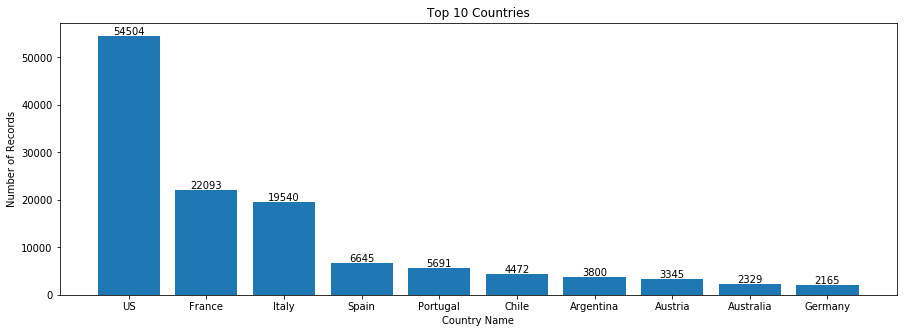

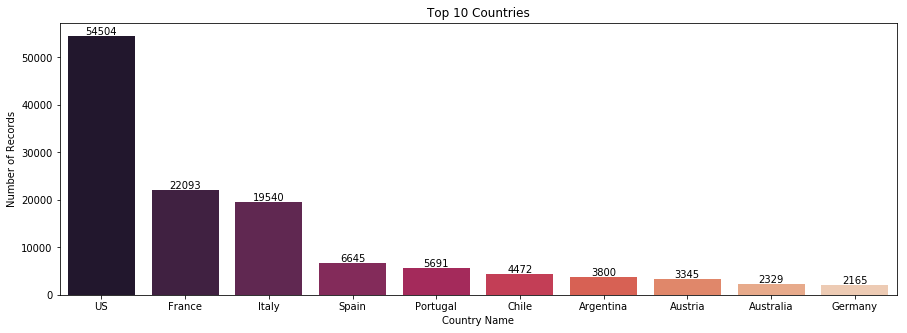

In [3]:
dataset_copy = dataset[['country', 'description']].copy() # Take a copy of original dataset
dataset_copy = dataset_copy.groupby(['country'], as_index=False).count() # group by country and get the count of description records in each group
dataset_copy = dataset_copy.rename(index=str, columns={"description":"count"}) # rename description to count
dataset_copy = dataset_copy.sort_values(by=['count'], ascending=False) # Sort using count descending
print(dataset_copy) # Print the data set

# Let's draw the bar chart using mathplotlib | for more details ->(https://matplotlib.org/gallery/lines_bars_and_markers/categorical_variables.html#sphx-glr-gallery-lines-bars-and-markers-categorical-variables-py)
plt.figure(figsize=(15, 5))
plt.bar(dataset_copy['country'][:10], dataset_copy['count'][:10])
plt.title('Top 10 Countries')
plt.ylabel('Number of Records')
plt.xlabel('Country Name')
# Text on the top of each barplot
for i, count in enumerate(dataset_copy['count'][:10]):
    plt.text(x=i , y=count+200, s=count, horizontalalignment='center')
plt.show()

# Let's draw the bar chart using seaborn | for more details -> (https://seaborn.pydata.org/examples/color_palettes.html)
plt.figure(figsize=(15, 5))
ax = sns.barplot(x=dataset_copy['country'][:10], y=dataset_copy['count'][:10], palette="rocket")
plt.title('Top 10 Countries')
plt.ylabel('Number of Records')
plt.xlabel('Country Name')
# Text on the top of each barplot
for i, count in enumerate(dataset_copy['count'][:10]):
    ax.text(x=i, y=count+200, s=count, horizontalalignment='center')
plt.show()


__What are the top ranked countries?__
<br>
The country with the highest ranking is England with 91.5 average scores. Second, it's India with 90.2 and Third Austria with 90.1. None of the top 5 rated countries isn't ranked with the highest average score. 
<br>
For Matplotib VS Seaborn there is no majot difference when using a bar chart and both of them provide a good output. 

       country  Avg. Points
14     England    91.581081
20       India    90.222222
3      Austria    90.101345
17     Germany    89.851732
7       Canada    89.369650
19     Hungary    89.191781
9        China    89.000000
15      France    88.845109
24  Luxembourg    88.666667
2    Australia    88.580507


       Avg. Points
count    43.000000
mean     87.648957
std       1.650070
min      83.562500
25%      86.916667
50%      87.686047
75%      88.571429
max      91.581081


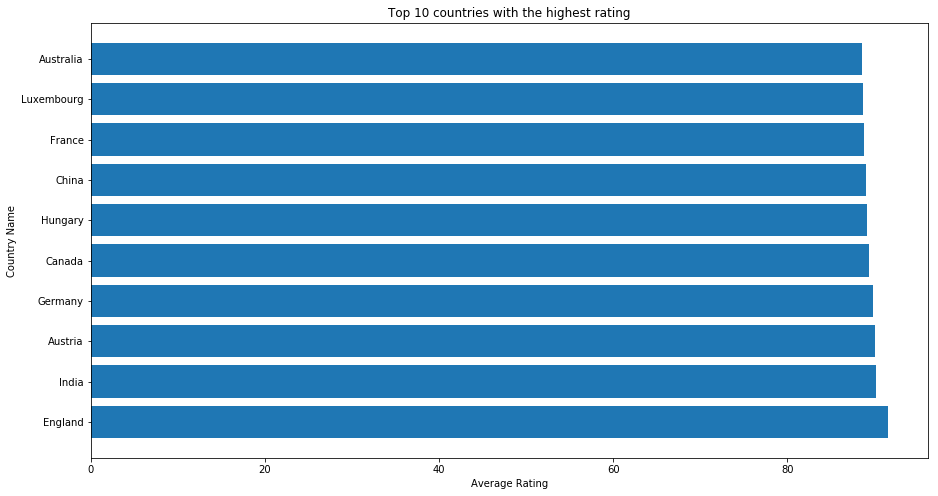

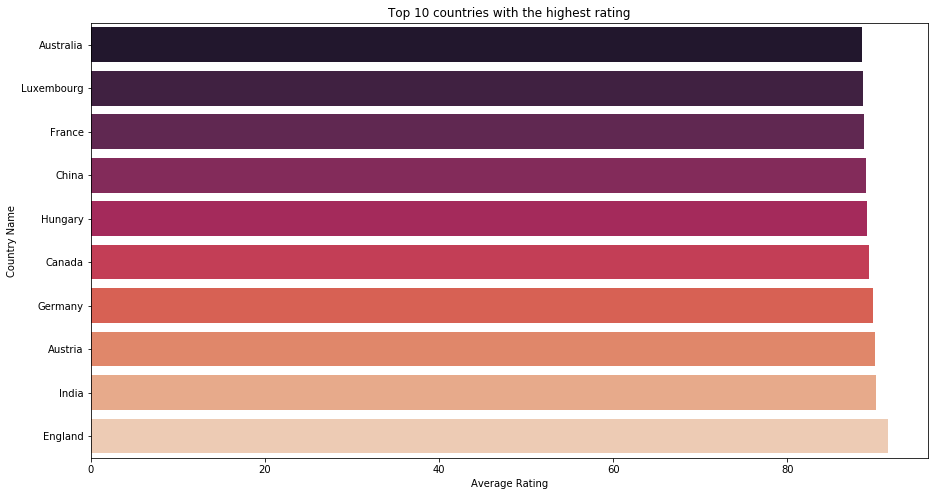

In [4]:
dataset_copy = dataset[['country', 'points']].copy() # Take a copy of original dataset
dataset_copy = dataset_copy.groupby(['country'], as_index=False).mean() # group by country and get the mean of points in each group
dataset_copy = dataset_copy.rename(index=str, columns={"points":"Avg. Points"}) # rename points to Avg. Points
dataset_copy = dataset_copy.sort_values(by=['Avg. Points'], ascending=False) # Sort using Avg. Points descending. 
print(dataset_copy[:10]) # Print top 10 records 
print('\n')
print(dataset_copy.describe()) 

# Let's draw the barh chart using mathplotlib
plt.figure(figsize=(15, 8))
plt.barh(dataset_copy['country'][:10], dataset_copy['Avg. Points'][:10])
plt.title('Top 10 countries with the highest rating')
plt.ylabel('Country Name')
plt.xlabel('Average Rating')
# plt.xticks(dataset_copy['Name'][:10], rotation='60')
plt.show()

# Let's draw the barh chart using seaborn
dataset_copy = dataset_copy[:10].sort_values(by=['Avg. Points'], ascending=True) # change the order of top 10 to lowest to heightest to maintain the consistency of the graph with above

plt.figure(figsize=(15, 8))
sns.barplot(x=dataset_copy['Avg. Points'], y=dataset_copy['country'], palette="rocket")
plt.title('Top 10 countries with the highest rating')
plt.ylabel('Country Name')
plt.xlabel('Average Rating')
plt.show()



We have decided to show another view for this questin using __boxplots.__ 
* The median for each country is partly different during the fact those are the top ten rated countries.
* For the following countries-Germany, Italy, Chile and Argentina the data is skewed which might indicates that the data may not be normally distributed.
* The sample size of Argentina and the US is relatively bigger comparing to the other countries. 


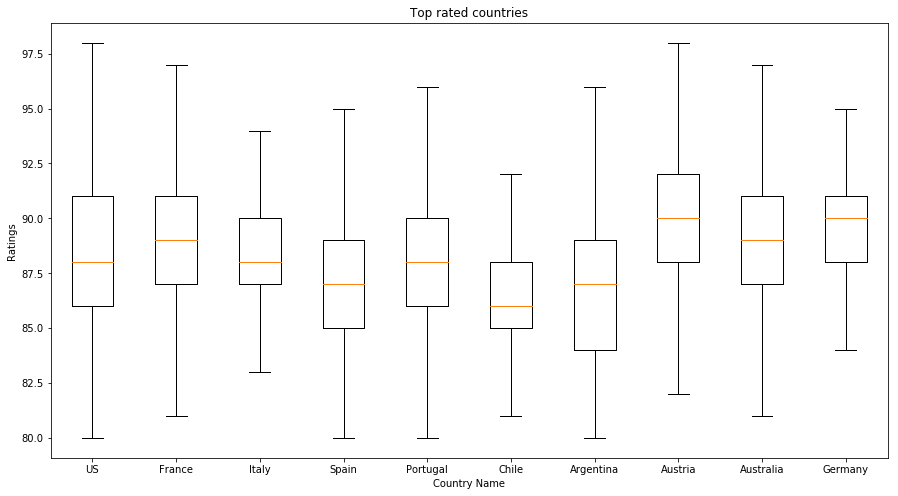

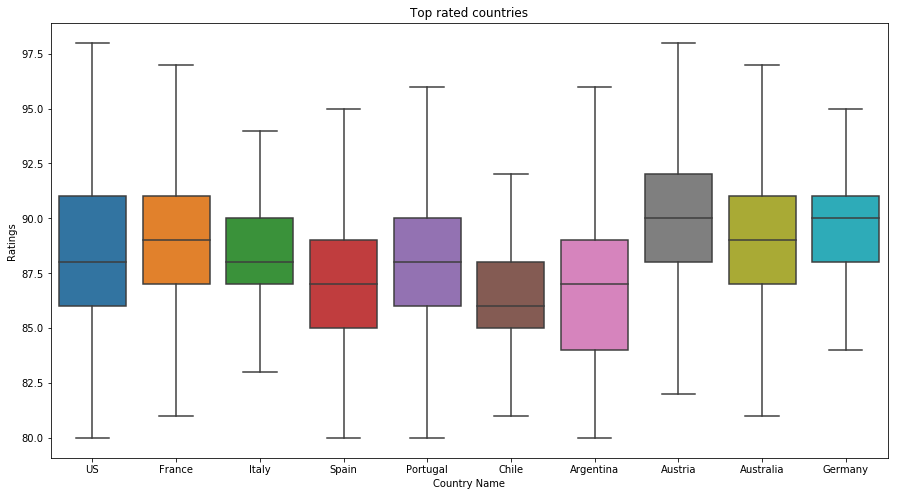

In [5]:
# Top 10 Countries vs rate
dataset_copy = dataset[['country', 'description']].copy() # Take a copy of original dataset
dataset_copy = dataset_copy.groupby(['country'], as_index=False).count() # group by country and get the count of description records in each group
dataset_copy = dataset_copy.rename(index=str, columns={"description":"count"}) # rename description to count
dataset_copy = dataset_copy.sort_values(by=['count'], ascending=False) # Sort using count descending
top_10 = dataset_copy[:10]['country'] # Got top 10 countries

dataset_copy = dataset[['points', 'country']].copy() # Take a copy of original dataset again
dataset_copy = dataset_copy.dropna() # drop null values

# Identify rating of wine in each country
data_dict = dict({})
for country in top_10:
    data_dict[country] = np.array(dataset_copy[dataset_copy['country']==country]['points'].astype(float))
    

# Let's plot
data = data_dict.values()
plt.figure(figsize=(15, 8))
plt.boxplot(data, 0, '', labels=list(top_10))
plt.title('Top rated countries')
plt.ylabel('Ratings')
plt.xlabel('Country Name')
plt.show()

# Let's plot seaborn
plt.figure(figsize=(15, 8))
ax = sns.boxplot(data=list(data), showfliers=False)
ax.set_xticklabels(list(top_10))
plt.title('Top rated countries')
plt.ylabel('Ratings')
plt.xlabel('Country Name')
plt.show()


__What is the average ranking per tester?__
<br>
Bellow there is a table that shows the tasters that ranked the highest score. We wanted to review wether there is a big difference among them to make sure that either of them doesn't tend to give higher score comparing to other. It's semms to be that all averages are prety similiar and the STD is not high.
<br>
After creating the Viz we thought that a better outcome would be recieved by using a bar chart. 
<br>
__The top 3 are bellow:__
<br> 
_Anne Krebiehl MW_   90.562551
<br>
_Matt Kettmann_     90.008686
<br>
_Virginie Boone_    89.213379

         taster_name  Avg. Points
2   Anne Krebiehl MW    90.562551
11     Matt Kettmann    90.008686
18    Virginie Boone    89.213379
13     Mike DeSimone    89.101167
14      Paul Gregutt    89.082564
9      Kerin O’Keefe    88.867947
16  Sean P. Sullivan    88.755739
15        Roger Voss    88.708003
7         Jim Gordon    88.626287
8     Joe Czerwinski    88.536235


       Avg. Points
count    19.000000
mean     88.233026
std       1.243610
min      85.855422
25%      87.323501
50%      88.536235
75%      88.975256
max      90.562551


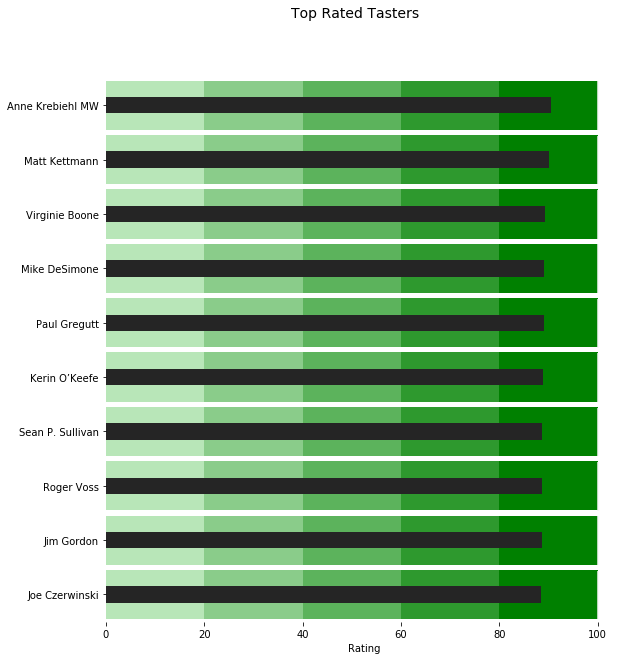

In [7]:
# There is no in-built method to generate bullet graph, hence used a function given in "https://pbpython.com/bullet-graph.html"
def bulletgraph(data=None, limits=None, labels=None, axis_label=None, title=None,
                size=(5, 3), palette=None, formatter=None, target_color="gray",
                bar_color="black", label_color="gray"):
    """ Build out a bullet graph image
        Args:
            data = List of labels, measures and targets
            limits = list of range valules
            labels = list of descriptions of the limit ranges
            axis_label = string describing x axis
            title = string title of plot
            size = tuple for plot size
            palette = a seaborn palette
            formatter = matplotlib formatter object for x axis
            target_color = color string for the target line
            bar_color = color string for the small bar
            label_color = color string for the limit label text
        Returns:
            a matplotlib figure
    """
    # Determine the max value for adjusting the bar height
    # Dividing by 10 seems to work pretty well
    h = limits[-1] / 10

    # Use the green palette as a sensible default
    if palette is None:
        palette = sns.light_palette("green", len(limits), reverse=False)

    # Must be able to handle one or many data sets via multiple subplots
    if len(data) == 1:
        fig, ax = plt.subplots(figsize=size, sharex=True)
    else:
        fig, axarr = plt.subplots(len(data), figsize=size, sharex=True)

    # Add each bullet graph bar to a subplot
    for idx, item in enumerate(data):

        # Get the axis from the array of axes returned when the plot is created
        if len(data) > 1:
            ax = axarr[idx]

        # Formatting to get rid of extra marking clutter
        ax.set_aspect('equal')
        ax.set_yticklabels([item[0]])
        ax.set_yticks([1])
        ax.spines['bottom'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(False)

        prev_limit = 0
        for idx2, lim in enumerate(limits):
            # Draw the bar
            ax.barh([1], lim - prev_limit, left=prev_limit, height=h,
                    color=palette[idx2])
            prev_limit = lim
        rects = ax.patches
        # The last item in the list is the value we're measuring
        # Draw the value we're measuring
        ax.barh([1], item[1], height=(h / 3), color=bar_color)

        # Need the ymin and max in order to make sure the target marker
        # fits
        ymin, ymax = ax.get_ylim()
        ax.vlines(
            item[2], ymin * .9, ymax * .9, linewidth=1.5, color=target_color)

    # Now make some labels
    if labels is not None:
        for rect, label in zip(rects, labels):
            height = rect.get_height()
            ax.text(
                rect.get_x() + rect.get_width() / 2,
                -height * .4,
                label,
                ha='center',
                va='bottom',
                color=label_color)
    if formatter:
        ax.xaxis.set_major_formatter(formatter)
    if axis_label:
        ax.set_xlabel(axis_label)
    if title:
        fig.suptitle(title, fontsize=14)
    fig.subplots_adjust(hspace=0)

dataset_copy = dataset[['taster_name', 'points']].copy() # Take a copy of original dataset
dataset_copy = dataset_copy.groupby(['taster_name'], as_index=False).mean() # group by taster_name and get the mean of points in each group
dataset_copy = dataset_copy.rename(index=str, columns={"points":"Avg. Points"}) # rename points to Avg. Points
dataset_copy = dataset_copy.sort_values(by=['Avg. Points'], ascending=False) # Sort using Avg. Points descending.
print(dataset_copy[:10])
print('\n')
print(dataset_copy.describe()) 

# similar to above
data_to_plot2 = list(zip(dataset_copy[:10]['taster_name'], dataset_copy[:10]['Avg. Points'], [100]*10))

bulletgraph(data_to_plot2, limits=[0, 20, 40, 60, 80, 100], size=(10,10),
            axis_label="Rating", label_color="blue",
            bar_color="#252525", target_color='#f7f7f7',
            title="Top Rated Tasters")

__What is the price distribution among the wines?__
<br>
The average price is 35USD. 
<br>
Most wines are bellow 25USD, the more the wine is expensive, the less common it is. 
<br> The distribution is not normal which mean that we might need to collect more data for wines with high price. 
<br> For Matplotib VS Seaborn there is no majot difference when using a bar chart and both of them provide a good output. 


               price
count  120916.000000
mean       35.368644
std        41.031052
min         4.000000
25%        17.000000
50%        25.000000
75%        42.000000
max      3300.000000


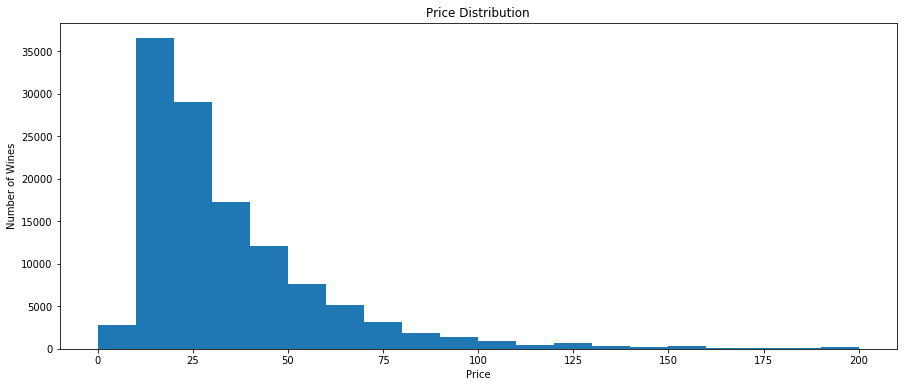

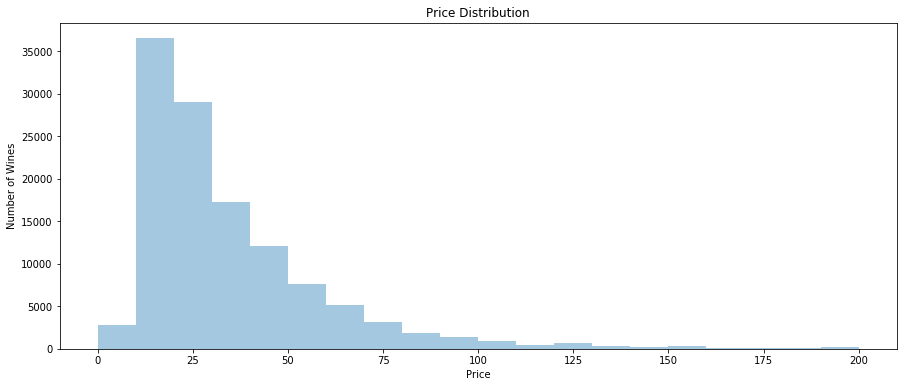

In [25]:
dataset_copy = dataset[['price', 'country']].copy() # Take a copy of original dataset
dataset_copy = dataset_copy.dropna() # drop null values

print(dataset_copy.describe())

# Let's draw hist from mathplotlib
plt.figure(figsize=(15,6))
plt.hist(dataset_copy['price'], bins=20, range=(0, 200))
plt.title('Price Distribution')
plt.ylabel('Number of Wines')
plt.xlabel('Price')
plt.show()

# Let's draw hist from seaborn
plt.figure(figsize=(15,6))
ax = sns.distplot(dataset_copy['price'], bins=20, kde=False, hist_kws={'range':(0, 200)});
plt.title('Price Distribution')
plt.ylabel('Number of Wines')
plt.xlabel('Price')
plt.show()


__Which taster experienced most of the wines?__
<br>
Roger Wess taste more wines comparing to the others tasters but he is not listed among the top 10 tasters with highest ranking which confirm that it didnt affect his rating. 


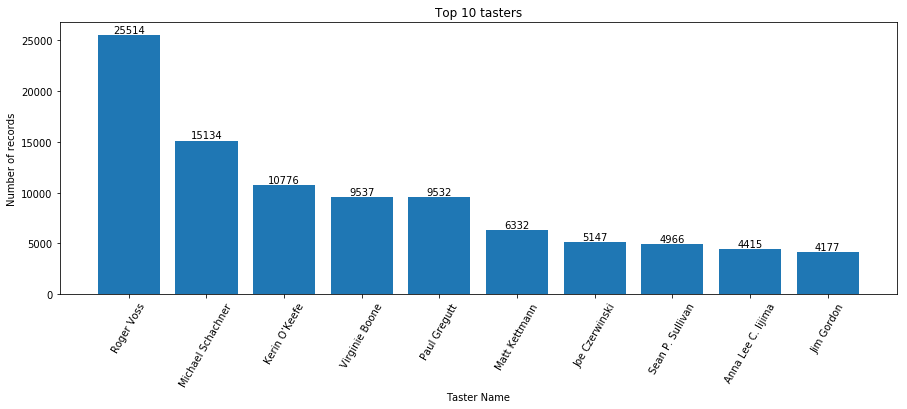

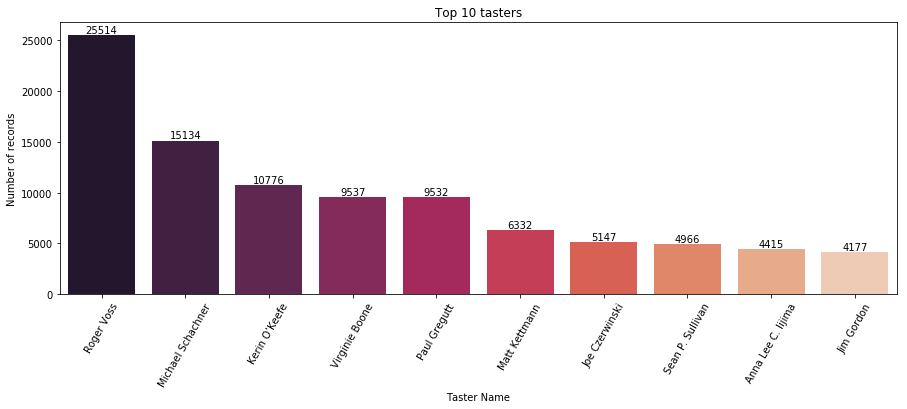

In [26]:
# similar to q1
dataset_copy = dataset[['taster_name', 'title']].copy() # Take a copy of original dataset
dataset_copy = dataset_copy.groupby(['taster_name'], as_index=False).count()
dataset_copy = dataset_copy.rename(index=str, columns={"title":"count"})
dataset_copy = dataset_copy.sort_values(by=['count'], ascending=False) # Sort using count
dataset_copy.head()

# Let's draw the bar chart using mathplotlib
plt.figure(figsize=(15, 5))
plt.bar(dataset_copy['taster_name'][:10], dataset_copy['count'][:10])
plt.title('Top 10 tasters')
plt.ylabel('Number of records')
plt.xlabel('Taster Name')
plt.xticks(dataset_copy['taster_name'][:10], rotation='60')
# Text on the top of each barplot
for i, count in enumerate(dataset_copy['count'][:10]):
    plt.text(x=i , y=count+200, s=count, horizontalalignment='center')
plt.show()

# Let's draw the bar chart using seaborn
plt.figure(figsize=(15, 5))
ax=sns.barplot(x=dataset_copy['taster_name'][:10], y=dataset_copy['count'][:10], palette="rocket")
plt.title('Top 10 tasters')
plt.ylabel('Number of records')
plt.xlabel('Taster Name')
ax.set_xticklabels(dataset_copy['taster_name'][:10], rotation='60')
# Text on the top of each barplot
for i, count in enumerate(dataset_copy['count'][:10]):
    ax.text(x=i, y=count+200, s=count, horizontalalignment='center')
plt.show()

__Which wine’s variety is the most popular?__
<br>
Pinot Noir is the most common wine with above 120K records, Second is Chardonay with above 110K and third is cabernet sauvignon with less than 100K records.  
For Matplotib VS Seaborn there is no majot difference when using a bar chart and both of them provide a good output. 


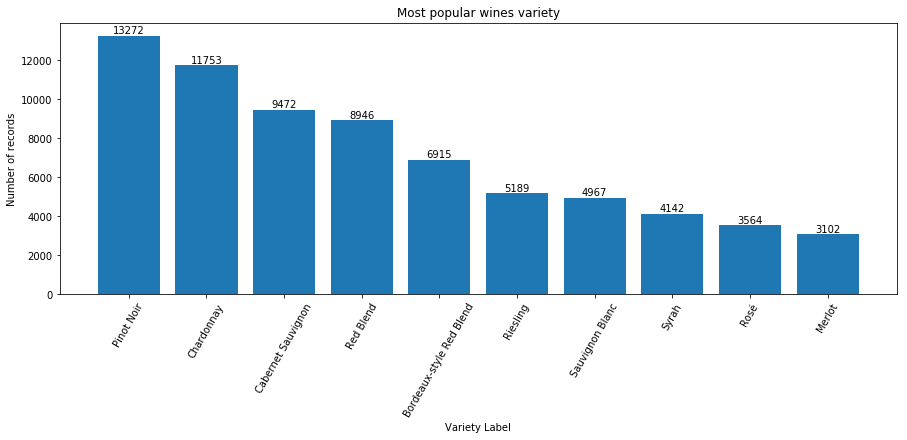

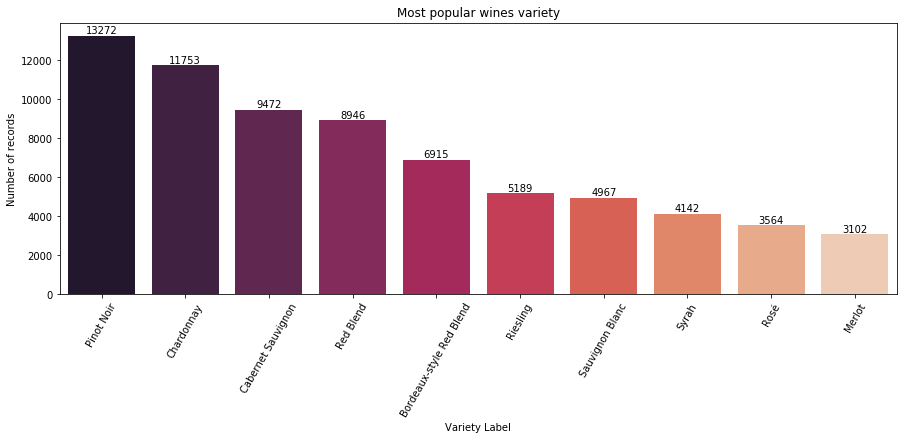

In [27]:
# similar to q1
dataset_copy = dataset[['variety', 'title']].copy() # Take a copy of original dataset
dataset_copy = dataset_copy.groupby(['variety'], as_index=False).count()
dataset_copy = dataset_copy.rename(index=str, columns={"title":"count"})
dataset_copy = dataset_copy.sort_values(by=['count'], ascending=False) # Sort using count
dataset_copy.head()

# Let's draw the bar chart using mathplotlib
plt.figure(figsize=(15, 5))
plt.bar(dataset_copy['variety'][:10], dataset_copy['count'][:10])
plt.title('Most popular wines variety')
plt.ylabel('Number of records')
plt.xlabel('Variety Label')
plt.xticks(dataset_copy['variety'][:10], rotation='60')
for i, count in enumerate(dataset_copy['count'][:10]):
    plt.text(x=i , y=count+100, s=count, horizontalalignment='center')
plt.show()

# Let's draw the bar chart using seaborn
plt.figure(figsize=(15, 5))
ax = sns.barplot(x=dataset_copy['variety'][:10], y=dataset_copy['count'][:10], palette="rocket")
ax.set_xticklabels(dataset_copy['variety'][:10], rotation='60')
plt.title('Most popular wines variety')
plt.ylabel('Number of records')
plt.xlabel('Variety Label')
for i, count in enumerate(dataset_copy['count'][:10]):
    ax.text(x=i, y=count+100, s=count, horizontalalignment='center')
plt.show()



The table bellow shows the most common variety  in each country 

In [8]:
dataset.head()
dataset_copy = dataset[['country', 'variety', 'description']].copy() # Take a copy of original dataset
dataset_copy = dataset_copy.groupby(['country', 'variety'], as_index=False).count() # group by country and get the count of description records in each group
dataset_copy = dataset_copy.rename(index=str, columns={"description":"count"}) # rename description to count
dataset_copy = dataset_copy.sort_values(by=['count'], ascending=False) # Sort using count descending

countries = []
varieties = []
for country in dataset_copy['country'].unique():
    countries.append(country)
    varieties.append(dataset_copy[dataset_copy['country']==country].iloc[0]['variety'])

result_table = pd.DataFrame(data={"Country": countries, "Variety": varieties})
result_table[:10]

,Country,Variety
0,US,Pinot Noir
1,France,Bordeaux-style Red Blend
2,Italy,Red Blend
3,Portugal,Portuguese Red
4,Germany,Riesling
5,Argentina,Malbec
6,Spain,Tempranillo
7,Austria,Grüner Veltliner
8,Chile,Cabernet Sauvignon
9,Australia,Shiraz


__Which countries provide the most expensive wines?__
* The median distribution is slight different among all countries.
* The sample size for all countries is not proprtional. 
* For moast countries the data is not distributed noramly. 

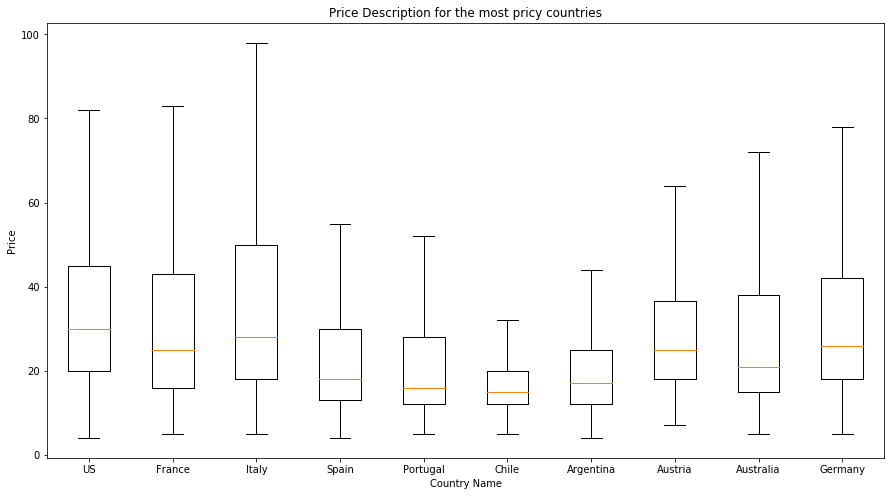

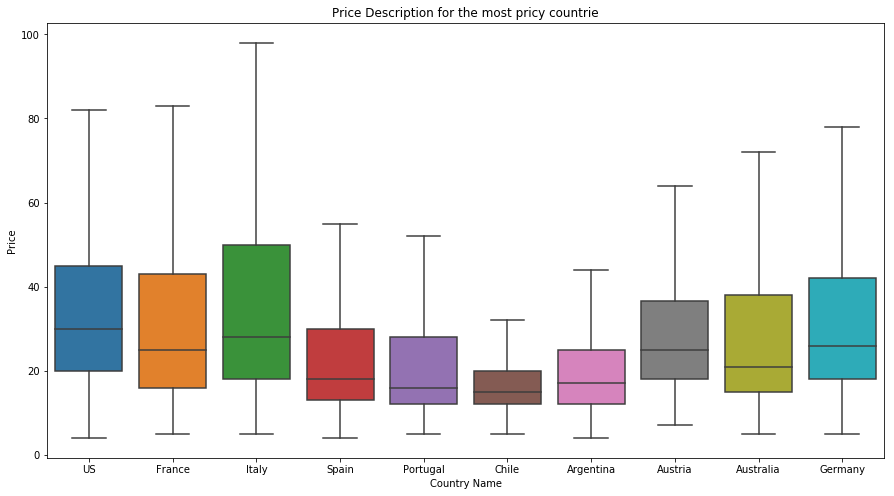

In [12]:
# Top 10 Countries vs Price
dataset_copy = dataset[['country', 'description']].copy() # Take a copy of original dataset
dataset_copy = dataset_copy.groupby(['country'], as_index=False).count() # group by country and get the count of description records in each group
dataset_copy = dataset_copy.rename(index=str, columns={"description":"count"}) # rename description to count
dataset_copy = dataset_copy.sort_values(by=['count'], ascending=False) # Sort using count descending
top_10 = dataset_copy[:10]['country'] # Got top 10 countries

dataset_copy = dataset[['price', 'country']].copy() # Take a copy of original dataset again
dataset_copy = dataset_copy.dropna() # drop null values

# Identify prices of wine in each country
data_dict = dict({})
for country in top_10:
    data_dict[country] = np.array(dataset_copy[dataset_copy['country']==country]['price'].astype(float))
    

# Let's plot
data = data_dict.values()
plt.figure(figsize=(15, 8))
plt.boxplot(data, 0, '', labels=list(top_10))
plt.title('Price Description for the most pricy countries')
plt.ylabel('Price')
plt.xlabel('Country Name')
plt.show()

# Let's plot seaborn
plt.figure(figsize=(15, 8))
ax = sns.boxplot(data=list(data), showfliers=False)
ax.set_xticklabels(list(top_10))
plt.title('Price Description for the most pricy countrie')
plt.ylabel('Price')
plt.xlabel('Country Name')
plt.show()


### Research Question
***
* The graph clearly shows that there is a positive correlation between the price to the rating. The more expensive the price the higher rating is. 
<br>
* There are many wines that have high ratings with a low price. 
<br>
* The most expensive wine didn't recieve a perfect score, which implies that wines with a high price tag don't necessarily taste better.
<br> 
* Seaborn graph was more helpful in this viz since the colors represent the number of records so where it's dark blue there is a concetration of records. 

C:\Users\maaya\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3604: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')
C:\Users\maaya\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3215: MatplotlibDeprecationWarning: 
The `xmin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `left` instead.
  alternative='`left`', obj_type='argument')


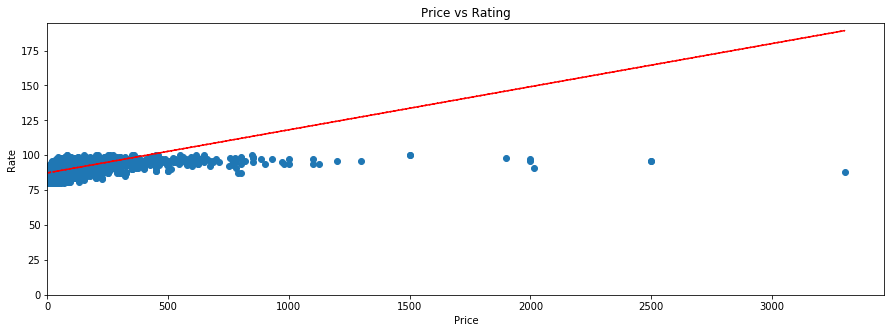

C:\Users\maaya\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3604: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')
C:\Users\maaya\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3215: MatplotlibDeprecationWarning: 
The `xmin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `left` instead.
  alternative='`left`', obj_type='argument')


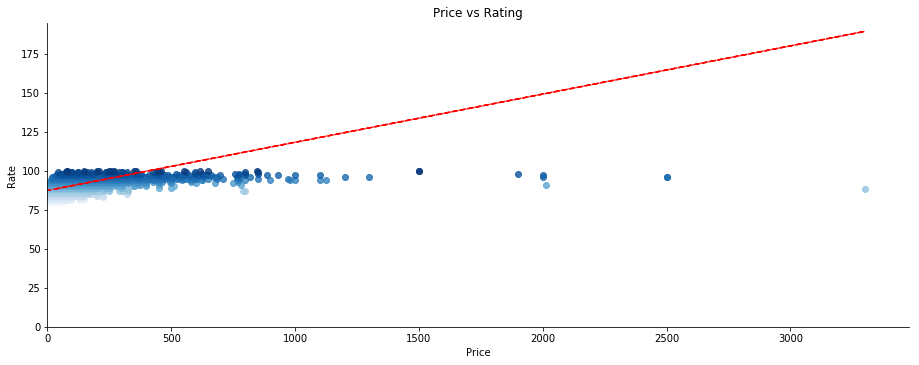

In [10]:
# Research problem

dataset_copy = dataset[['points', 'price']].copy() # Take a copy of original dataset
dataset_copy = dataset_copy.dropna() # drop all records if either points or price Null
x = dataset_copy['price']
y = dataset_copy['points']

# mathplotlib grapg
plt.figure(figsize=(15, 5))
plt.scatter(x, y)

# create trend | for more details (http://widu.tumblr.com/post/43624347354/matplotlib-trendline)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), "r--")

plt.title('Price vs Rating')
plt.ylabel('Rate')
plt.xlabel('Price')

plt.ylim(ymin=0)
plt.xlim(xmin=0)

plt.show()

# seaborn figure | fpr more details -> (https://seaborn.pydata.org/examples/anscombes_quartet.html)
ax = sns.lmplot( x='price', y='points', data=dataset_copy, fit_reg=False, hue='points', legend=False, palette="Blues", height=5, aspect=2.6)

# create trend
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), "r--")

plt.title('Price vs Rating')
plt.ylabel('Rate')
plt.xlabel('Price')

plt.ylim(ymin=0)
plt.xlim(xmin=0)

plt.show()